In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# http://staff.bath.ac.uk/pssiw/stats2/page16/page16.html
df = pd.read_csv("data/awards.csv", index_col=0)
df.head()

,num_awards,prog,math
id,,,
45,1,3,41
108,1,1,41
15,1,3,44
67,1,3,42
153,1,3,40


In [3]:
df.describe()

,num_awards,prog,math
count,200.000000,200.000000,200.000000
mean,0.970000,2.025000,52.645000
std,1.046218,0.690477,9.368448
min,0.000000,1.000000,33.000000
25%,0.000000,2.000000,45.000000
50%,1.000000,2.000000,52.000000
75%,1.000000,2.250000,59.000000
max,6.000000,3.000000,75.000000


In [4]:
df = pd.get_dummies(df, columns=["prog"])
del df['prog_1']
df.head()

,num_awards,math,prog_2,prog_3
id,,,,
45,1,41,0,1
108,1,41,0,0
15,1,44,0,1
67,1,42,0,1
153,1,40,0,1


In [5]:
df['math'] = (df['math'] - np.mean(df['math']))/(2 * np.std(df['math']))
df.head()

,num_awards,math,prog_2,prog_3
id,,,,
45,1,-0.623061,0,1
108,1,-0.623061,0,0
15,1,-0.462547,0,1
67,1,-0.569556,0,1
153,1,-0.676565,0,1


In [6]:
X = np.column_stack((np.ones((df.shape[0], 1)), df[['math', 'prog_2', 'prog_3']]))
y = df['num_awards']

In [7]:
mod = sm.formula.GLM(y, X, family = sm.families.Poisson()).fit()
mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:             num_awards   No. Observations:                  200
Model:                            GLM   Df Residuals:                      196
Model Family:                 Poisson   Df Model:                            3
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -244.18
Date:                Tue, 21 Aug 2018   Deviance:                       198.05
Time:                        14:54:13   Pearson chi2:                     179.
No. Iterations:                     5   Covariance Type:             nonrobust
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.4890      0.196     -2.492      0.013      -0.874      -0.104
x1             0.6687      0.156      4.288      0.000       0.363       0.974
x2             0.4526      0.225      2.014      0.044       0.012       0.893
x3             0.5617      0.247      2.270      0.023       0.077       1.047
==============================================================================
"""

In [8]:
model_fitted_y = mod.fittedvalues
model_residuals = mod.df_resid
model_abs_resid = np.abs(model_residuals)

Text(0,0.5,'Residuals')

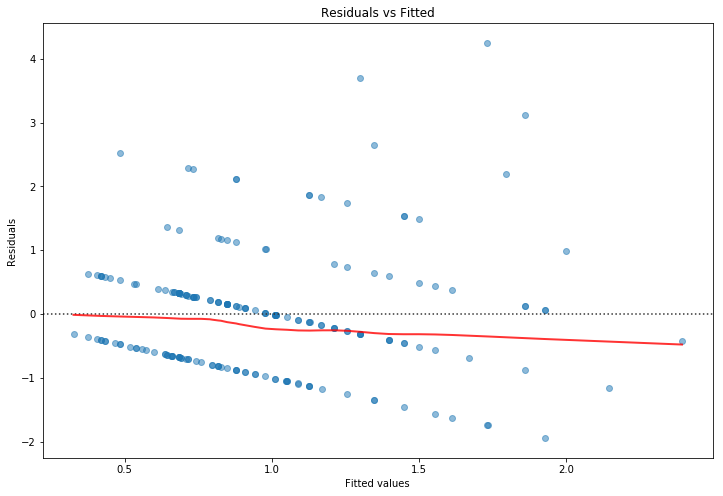

In [9]:
# https://medium.com/@emredjan/emulating-r-regression-plots-in-python-43741952c034
plot_lm_1 = plt.figure(1)
plot_lm_1.set_figheight(8)
plot_lm_1.set_figwidth(12)

plot_lm_1.axes[0] = sns.residplot(model_fitted_y, 'num_awards', data=df, 
                          lowess=True, 
                          scatter_kws={'alpha': 0.5}, 
                          line_kws={'color': 'red', 'lw': 2, 'alpha': 0.8})

plot_lm_1.axes[0].set_title('Residuals vs Fitted')
plot_lm_1.axes[0].set_xlabel('Fitted values')
plot_lm_1.axes[0].set_ylabel('Residuals')